<a href="https://colab.research.google.com/github/erikhhs/ads/blob/main/Proefstuderen/ML_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welke soort pinguin is dit?
In dit notebook proberen we aan de hand van kenmerken van pinguins te voorspellen om welke pinguinsoort het gaat. 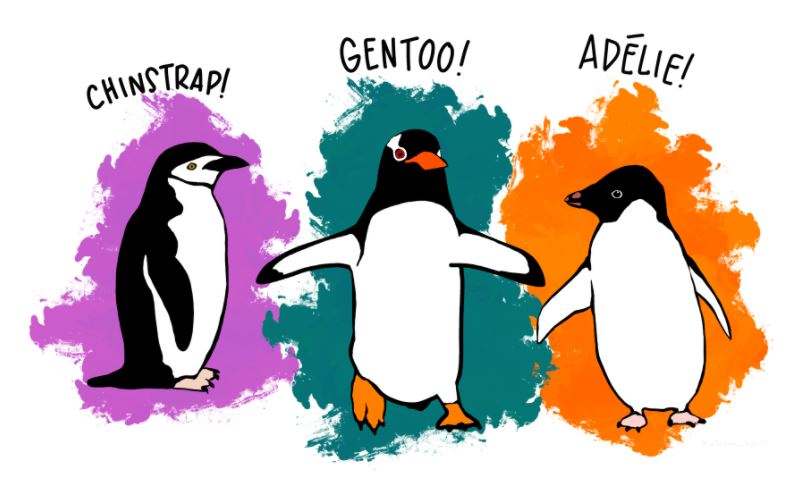

## Importeren toolset
- De tools die we gebruiken moeten we eerst importeren voordat we ze kunnen gebruiken.

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree as tree_plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 1. Laden van de penguins data set
- 6 kolommen met kenmerken van de pinguin
- 1 kolom waarin de soort (species) pinguin staat

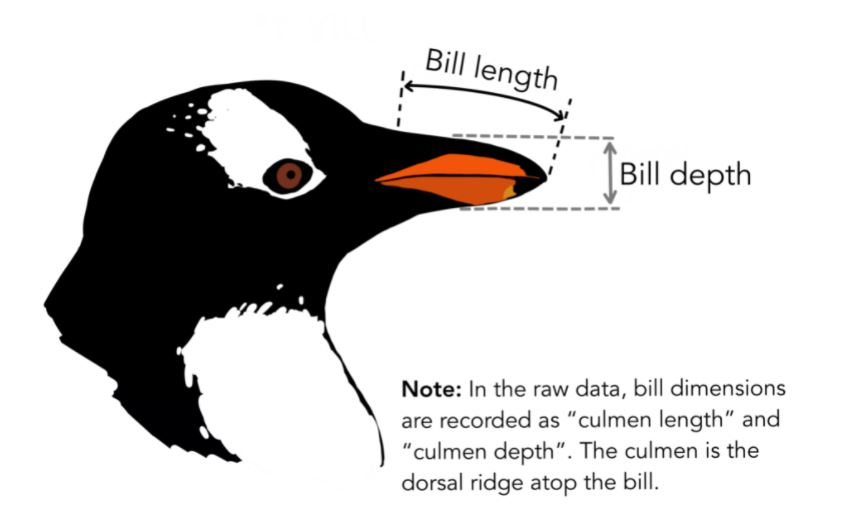

- Voer onderstaande cel uit om de data te laden

In [ ]:
df=sns.load_dataset('penguins')
df

- Voer onderstaande cel uit om informatie over het dataframe te zien.

In [ ]:
df.info()

### 1.1 Data
- We hebben te maken met twee soorten data, welke soorten zijn dat?
- Er ontbreekt ook data in sommige kolommen. Welke kolommen zijn dat

Dubbelklik hier om je antwoord in te vullen:


- In onderstaande cel verwijderen we alle regels waar NaN in staat.

In [ ]:
df = df.dropna()
df.info()

## 2.1 Analyse: aantal per soort
Voordat we gaan voorspellen, gaan we eerst de data analyseren.
- Voer onderstaande cel uit om bepalen hoeveel regels we per soort in de dataset hebben.

In [ ]:
sns.catplot(kind = 'count', x = 'species', data=df)

## 2.2 Impact van numerieke kenmerken op soort

We willen nu een beeld vormen over welke kenmerken de meeste informatie geven over de soort van de pinguin. Is snavellengte ('bill_lenght_mm') bijvoorbeeld een goede voorspeller of hebben we juist meer aan de flipperlengte ('flipper_length_mm')?
- Gebruik pen en papier om een grafiek te ontwerpen waarmee je eenvoudig kunt zien in hoeverre de snavellengte per soort verschilt.

- Pas de code in onderstaande cel aan, zodat je kunt zien wat de gemiddelde kenmerkwaardes per soort zijn.
- Doe dit voor de volgende kenmerken:
  - Snavellengte (deze is al correct)
  - Snaveldiepte
  - Flipperlengte
  - Gewicht (massa)
- Wat maak je op uit deze grafieken?


Dubbelklik hier om je antwoord in te vullen:


In [ ]:
sns.catplot(kind = 'bar', x = 'species', y = 'bill_length_mm', data=df)
sns.catplot(kind = 'bar', x = '', y = '', data=df)
sns.catplot(kind = 'bar', x = '', y = '', data=df)
sns.catplot(kind = 'bar', x = '', y = '', data=df)

In plaats van de naar gemiddelden te kijken, kunnen we ook kijken naar verdelingen. Dit geeft vaak meer inzicht.
- Voer onderstaande cel uit om een histogram te maken voor snavellengte.
- Beschrijf in je eigen woorden wat je hieruit opmaakt.

Dubbelklik hier om je antwoord in te vullen:


In [ ]:
sns.displot(df, x='bill_length_mm', fill=True)

- Voer onderstaande cel uit om een histogram te maken van de snavellengte per soort.
- Beschrijf in je eigen woorden wat je hieruit opmaakt.

Dubbelklik hier om je antwoord in te vullen:


In [ ]:
sns.displot(df, x='bill_length_mm', hue="species", fill=True)

- Voer onderstaande cel uit om verdelingen te zien in plaats van een histogram.
- Welke van de 4 kenmerken is het meest geschikt om onderscheid te maken tussen de verschillende soorten? Leg uit waarom.

Dubbelklik hier om je antwoord in te vullen:


In [ ]:
sns.displot(df, x='bill_length_mm', hue="species", kind="kde", fill=True)
sns.displot(df, x='bill_depth_mm', hue="species", kind="kde", fill=True)
sns.displot(df, x='flipper_length_mm', hue="species", kind="kde", fill=True)
sns.displot(df, x='body_mass_g', hue="species", kind="kde", fill=True)

## 2.3 Analyse niet-numerieke kenmerken
Naast de numerieke kenmerken kunnen ook niet-numerieke (categoriale) kenmerken van belang zijn.
- Voer onderstaande cel uit. Beschrijf in je eigen woorden welke informatie je in deze grafieken vindt, die nuttig is voor het voorspellen van de pinguinsoort?

Dubbelklik hier om je antwoord in te vullen:


In [ ]:
sns.catplot(kind = 'count', x = 'species', col = 'island', data=df)
sns.catplot(kind = 'count', x = 'species', col = 'sex', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'bill_length_mm', col = 'sex', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'bill_depth_mm', col = 'sex', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'flipper_length_mm', col = 'sex', data=df)
sns.catplot(kind = 'bar', x = 'species', y = 'body_mass_g', col = 'sex', data=df)

# 3 Voorspellen van de pinguinsoort

### 3.1 Omzetten naar numeriek
Machine Learning modellen kunnen niet omgaan met tekst. We moeten daarom de teksten omzetten in getallen.
- Voer onderstaande cel uit. De eventuele waarschuwing die je krijgt kun je negeren.
- Bekijk het df_dum dataframe en leg in je eigen woorden uit hoe de tekstkolommen zijn omgezet naar getallen.

Dubbelklik hier om je antwoord in te vullen:


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_dum = df.copy()
df_dum['species'] = le.fit_transform(df_dum['species'])

names = list(le.classes_)
df_dum = pd.get_dummies(df_dum, columns=['island', 'sex'])
display(df_dum)

## Splitsen in x-variabelen en y-variabele

- Met de x-variabelen proberen we de y-variabele zo goed mogelijk te voorspellen.
- X-variabelen: de kenmerken van pinguin (snavellengte etc.)
- y-variabele: de klasse die we willen voorspellen. In dit geval de soort pinguin (0, 1 of 2)
Voer onderstaande cel uit:
- Het resultaat bestaat uit twee dataframes. Wat doet de drop() functie?


Dubbelklik hier om je antwoord in te vullen:


In [ ]:
X = df_dum.drop(['species'], axis=1)
y = df_dum[['species']]
display(X,y)

## Splitsen in training data en test data
- De training data gebruiken we om het model te trainen
- De test data gebruiken we om te bepalen hoe goed ons model kan voorspellen
Voer onderstaande cel uit.
- Welk percentage van de totale dataset gebruiken we om ons model te trainen?

Dubbelklik hier om je antwoord in te vullen:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
print('X_train:', 'Aantal rijen =' ,X_train.shape[0], ',','Aantal kolommen =', X_train.shape[1], )
print('y_train: ', 'Aantal rijen =', y_train.shape[0], ',','Aantal kolommen =', 1 )
print('X_test:', 'Aantal rijen =' ,X_test.shape[0], ',','Aantal kolommen =', X_test.shape[1], )
print('y_test: ', 'Aantal rijen =', y_test.shape[0], ',','Aantal kolommen =', 1 )


## Trainen van het model
- In dit geval maken we een beslisboom (decision tree)
- Voer onderstaande cel uit om het model te trainen

In [ ]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

## Visualisatie van het model
- Voer onderstaande cel uit.
- Leg uit hoe deze beslisboom werkt. Vul daarvoor deze tekst aan:
Als de flipperlengte kleiner dan of gelijk is aan ...... dan is de pinguinsoort waarschijnlijk ...... Er zijn ..... rijen (samples) die kleiner dan of gelijk zijn aan dit getal. Van deze rijen zijn er .... een Adelie, .... zijn een Chinstrap en .... zijn een Gento.



In [ ]:
fig = plt.figure(figsize=(140,60))
_ = tree_plt.plot_tree(tree,
                   feature_names=X.columns,
                   class_names=names,
                   filled=True, impurity = True , fontsize = 60)

## Voorspellen met de getrainde beslisboom
We gebruiken de test data om te bepalen hoe goed ons model is
- Voer onderstaande cel uit om de voorspellingen en de werkelijkheid te zien.
- In de eerste regel van de voorspellingen vind je een waarde die afwijkt van de werkelijkheid. Wat is deze voorspelde waarde en wat is de werkelijke waarde?

Dubbelklik hier om je antwoord in te vullen:


In [ ]:
predictions = tree.predict(X_test)
display('Onze voorspellingen:', predictions[:])
display('De werkelijkheid:', np.array(y_test['species']))
print("Percentage juist voorspeld: {:.2f} ".format( tree.score(X_test, y_test)*100))

## Analyseren van de voorspellingen
- Voer onderstaande cel uit
- Bestudeer de 'confusion matrix'. Hoeveel voorspellingen zijn onjuist? Wat was de voorspelde soort en wat was de werkelijke soort van deze voorspellingen?

Dubbelklik hier om je antwoord in te vullen:


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=names)
disp.plot()
plt.show()